##  实战：泰坦尼克号生存预测

- 案例：泰坦尼克号生存预测
    - **项目背景**:  泰坦尼克号沉船事件是历史上最著名的海难之一。本项目旨在通过分析乘客的个人信息（如性别、年龄、船舱等级等），构建模型预测乘客是否在海难中幸存。这是一个经典的二分类问题。
    - **数据集**:  使用 Kaggle 提供的泰坦尼克号数据集，包含训练集 `train.csv` 和测试集 `test.csv`。 训练集用于模型训练，测试集用于评估模型性能 (在本项目中，我们主要使用训练集进行演示和模型评估)。 数据集包含乘客的以下特征：

        - `PassengerId`: 乘客ID
        - `Survived`: 生存情况 (0=未幸存, 1=幸存) - **目标变量**
        - `Pclass`: 船舱等级 (1st, 2nd, 3rd)
        - `Name`: 乘客姓名
        - `Sex`: 性别
        - `Age`: 年龄
        - `SibSp`: 兄弟姐妹/配偶在船上的数量
        - `Parch`: 父母/子女在船上的数量
        - `Ticket`: 船票号码
        - `Fare`: 船票价格
        - `Cabin`: 船舱号
        - `Embarked`: 登船港口 (C=瑟堡, Q=皇后镇, S=南安普顿)

- **数据加载与初步分析**:  使用 pandas 加载泰坦尼克号训练数据集，查看数据基本信息，了解特征和目标变量。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mistymcollins/titanic-dataset-orginal-download")

print("Path to dataset files:", path)
print("Files in dataset:")
for file in os.listdir(path):
    print(file)

# 加载数据集
data = pd.read_csv(path + '/train.csv')

# 查看数据 head
print("Data Head:")
print(data.head())

# 查看数据 info
print("\nData Info:")
print(data.info())

# 查看数据 describe
print("\nData Describe:")
print(data.describe())

# 查看缺失值
print("\nMissing Values:")
print(data.isnull().sum())


Path to dataset files: /Users/wangxq/.cache/kagglehub/datasets/mistymcollins/titanic-dataset-orginal-download/versions/1
Files in dataset:
test.csv
train.csv
Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85    

- **代码解释**:
    - 导入常用库 `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `os`, `kagglehub`。
    - 使用 `kagglehub.dataset_download()` 下载 `mistymcollins/titanic-dataset-orginal-download` 数据集。
    - 使用 `os.listdir()` 查看数据集文件列表。
    - 使用 `pd.read_csv()` 加载 `train.csv` 文件。
    - 使用 `data.head()` 查看数据的前几行，快速了解数据格式。
    - 使用 `data.info()` 查看数据类型、缺失值情况等信息。
    - 使用 `data.describe()` 查看数值特征的统计信息，如均值、标准差、最小值、最大值等。
    - 使用 `data.isnull().sum()` 查看缺失值情况。

- **初步分析**:  通过 `data.isnull().sum()` 可以看到 `Age`, `Cabin`, `Embarked` 列存在缺失值。 `data.describe()` 可以帮助我们了解数值特征的大致分布范围。

- **数据可视化**:  通过可视化方法，更直观地理解数据特征，发现特征与目标变量之间的关系。

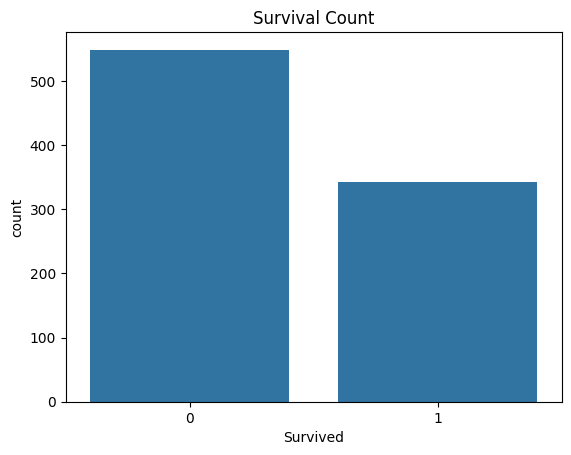

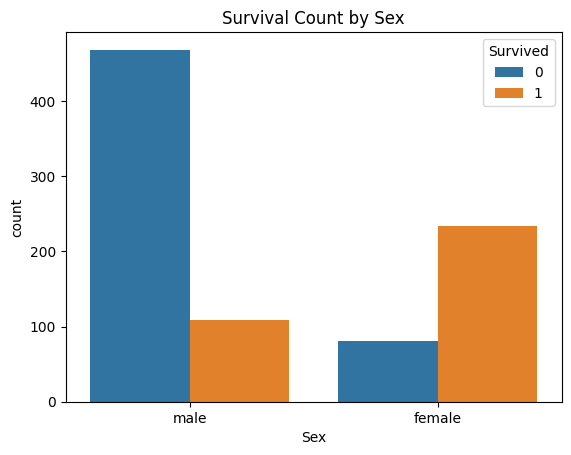

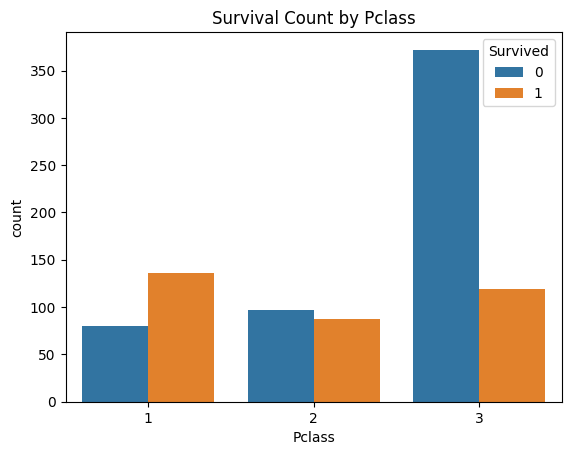

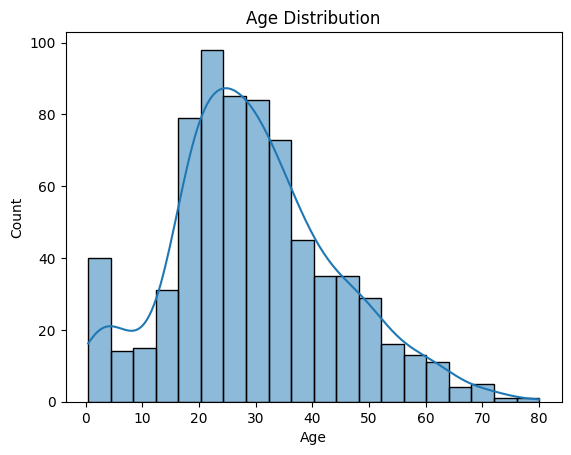

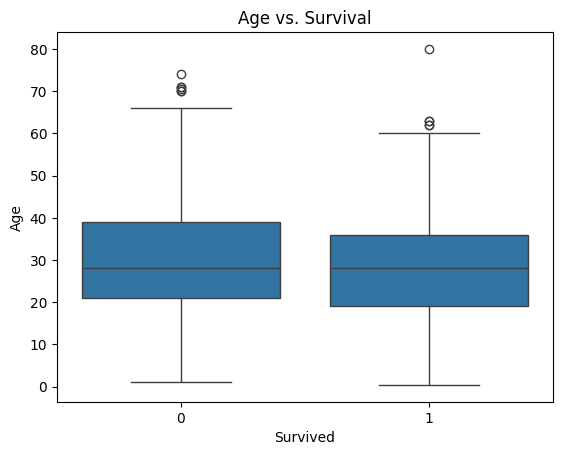

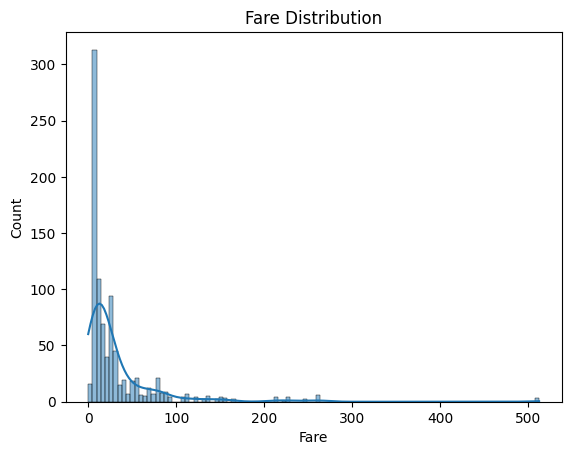

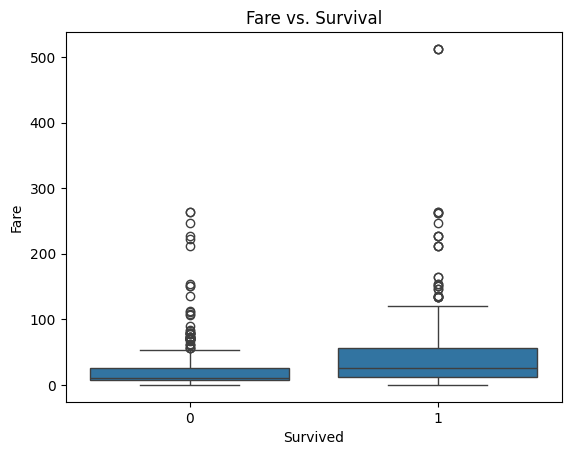

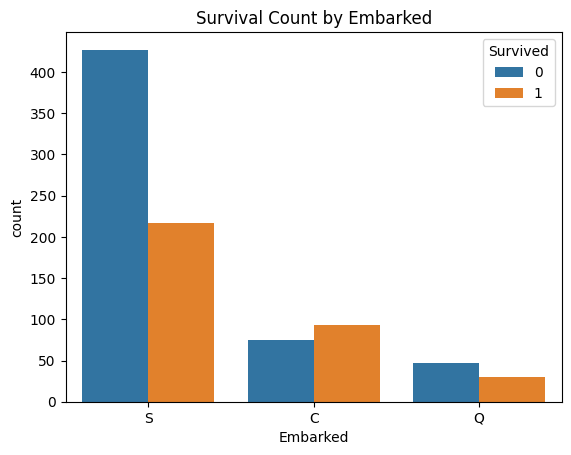

In [9]:
# 生存情况可视化
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# 性别与生存情况可视化
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Sex')
plt.show()

# 船舱等级与生存情况可视化
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Pclass')
plt.show()

# 年龄分布可视化
sns.histplot(data['Age'].dropna(), kde=True) # dropna() 移除缺失值
plt.title('Age Distribution')
plt.show()

# 年龄与生存情况的箱线图
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs. Survival')
plt.show()

# 船票价格分布可视化
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# 船票价格与生存情况的箱线图
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare vs. Survival')
plt.show()

# 登船港口与生存情况可视化
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival Count by Embarked')
plt.show()

- **代码解释**:
    - 使用 `seaborn.countplot()` 绘制计数条形图，展示类别特征的分布和不同类别下生存情况的对比。
    - 使用 `seaborn.histplot()` 绘制直方图，展示数值特征的分布。 `dropna()` 用于移除 `Age` 列的缺失值，避免影响直方图绘制。 `kde=True` 添加核密度估计曲线。
    - 使用 `seaborn.boxplot()` 绘制箱线图，展示数值特征在不同生存情况下的分布，观察数值特征与生存情况的关系。
    - `plt.title()` 添加图表标题， `plt.show()` 显示图表。

- **可视化分析**:
    - **`Survived`**:  未幸存人数多于幸存人数。
    - **`Sex`**:  女性幸存比例明显高于男性。
    - **`Pclass`**:  船舱等级越高，幸存比例越高。
    - **`Age`**:  年龄分布大致呈正态分布，但有少量缺失值。 年龄对生存率有一定影响，但不如性别和船舱等级明显。
    - **`Fare`**:  船票价格分布偏态分布，大部分票价较低。 票价越高，幸存率越高。
    - **`Embarked`**:  登船港口对生存率有一定影响，C 港口幸存率略高。

- **数据预处理**:  处理缺失值和类别特征编码。

In [10]:
# 处理缺失值
# Age: 使用中位数填充
data['Age'].fillna(data['Age'].median(), inplace=True)
# Embarked: 使用众数填充
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Cabin: 缺失值较多，暂时删除该特征 (或者可以考虑填充为 'Unknown')
data.drop('Cabin', axis=1, inplace=True)

# 类别特征编码
# Sex, Embarked: 使用独热编码
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
# Pclass:  可以考虑使用独热编码，或者保持数值型 (Ordinal 特征)
# 这里为了简化，暂时保持 Pclass 为数值型

# 删除不需要的特征
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("\nData after preprocessing:")
print(data.head())
print("\nData Info after preprocessing:")
print(data.info())


Data after preprocessing:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  

Data Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare

- **代码解释**:
    - **缺失值填充**:
        - `Age` 列使用中位数 (`median()`) 填充缺失值。 中位数对异常值不敏感，比均值更稳健。 `inplace=True` 表示直接在原 DataFrame 上修改。
        - `Embarked` 列使用众数 (`mode()`) 填充缺失值。 `mode()` 返回 Series，使用 `[0]` 取出众数值。
        - `Cabin` 列缺失值太多，直接删除 (`drop()`) 该列。 `axis=1` 表示删除列。
            - **类别特征编码**:
                - `Sex`, `Embarked` 列使用 `pd.get_dummies()` 进行独热编码。 `drop_first=True` 表示删除第一个类别，避免共线性。 例如，`Sex_male` 列为 1 表示男性，为 0 表示女性 (女性信息已包含在 `Sex_male=0` 中)。
            - **删除特征**:
                - 删除 `PassengerId`, `Name`, `Ticket` 列，这些特征对预测生存率没有直接帮助。

        - **预处理说明**:
            - 缺失值处理方法选择需要根据实际情况和特征类型决定。  例如，`Age` 使用中位数填充，`Embarked` 使用众数填充，`Cabin` 直接删除。
            - 类别特征编码常用方法包括独热编码、标签编码、顺序编码等。  这里 `Sex` 和 `Embarked` 使用独热编码，`Pclass` 暂时保留数值型。
            - 特征删除需要谨慎，避免删除重要信息。  这里删除 `PassengerId`, `Name`, `Ticket` 是因为它们与生存率的直接关系较弱。

 - **特征工程**:  创建新的特征，可能提高模型性能。

In [11]:
# 特征工程
# FamilySize: 家庭成员数量 = SibSp + Parch + 1 (包括乘客自己)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
# IsAlone: 是否独自一人 (FamilySize = 1)
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# 可以考虑对 Name 特征进行更复杂的特征提取，例如提取称谓 (Mr., Mrs., Miss. 等)，
# 但这里为了简化，暂时不做更复杂的 Name 特征工程

print("\nData after feature engineering:")
print(data.head())


Data after feature engineering:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  FamilySize  IsAlone  
0        True           2        0  
1       False           2        0  
2        True           1        1  
3        True           2        0  
4        True           1        1  


- **代码解释**:
    - **`FamilySize`**:  将 `SibSp` (兄弟姐妹/配偶数量) 和 `Parch` (父母/子女数量) 相加，再加 1 (乘客自己)，得到家庭成员总数。
    - **`IsAlone`**:  创建一个新的二元特征 `IsAlone`，表示乘客是否独自一人旅行。 如果 `FamilySize` 等于 1，则 `IsAlone` 为 1，否则为 0。  `.astype(int)` 将布尔值转换为整数 (True -> 1, False -> 0)。

- **特征工程说明**:
    - 特征工程是机器学习中非常重要的一步，好的特征工程可以显著提升模型性能。
    - 特征工程需要结合业务理解和数据分析，创造出对模型预测有帮助的新特征。
    - 这里创建了 `FamilySize` 和 `IsAlone` 特征，希望能够反映家庭因素对生存率的影响。  还可以尝试更多特征工程方法，例如从 `Name` 中提取称谓等。

- **模型训练**:  使用常用的分类算法进行模型训练。 这里选择逻辑回归、K-近邻 (KNN)、决策树算法。

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 准备特征 (X) 和目标变量 (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 逻辑回归
logreg = LogisticRegression(random_state=42, max_iter=1000) # 增加 max_iter
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# K-近邻 (KNN)
knn = KNeighborsClassifier(n_neighbors=5) # 默认 K=5
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 决策树
dtree = DecisionTreeClassifier(random_state=42, max_depth=5) # 限制树深度
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("\nModel Training Completed.")


Model Training Completed.


- **代码解释**:
    - 导入模型和评估指标： `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `accuracy_score`, `classification_report`。
    - 准备特征矩阵 `X` (去除 `Survived` 列) 和目标变量 `y` (`Survived` 列)。
    - 使用 `train_test_split()` 将数据集划分为训练集和测试集。 `test_size=0.2` 表示测试集占 20%， `random_state=42` 设置随机种子，保证结果可重复。
    - 分别创建逻辑回归 (`LogisticRegression`), KNN (`KNeighborsClassifier`), 决策树 (`DecisionTreeClassifier`) 模型实例。  `random_state` 用于保证结果可重复， `max_iter` 增加逻辑回归最大迭代次数， `max_depth` 限制决策树深度，防止过拟合。
    - 使用 `fit()` 方法在训练集上训练模型。
    - 使用 `predict()` 方法在测试集上进行预测，得到预测结果 `y_pred_logreg`, `y_pred_knn`, `y_pred_dtree`。

- **模型评估**:  评估模型在测试集上的性能。 使用准确率 (Accuracy) 和分类报告 (Classification Report)。

In [13]:
# 模型评估
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\nK-Nearest Neighbors (KNN) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\nDecision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))


Logistic Regression Evaluation:
Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.7094972067039106
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       105
           1       0.69      0.54      0.61        74

    accuracy                           0.71       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179


Decision Tree Evaluation:
Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90

- **代码解释**:
    - 使用 `accuracy_score()` 计算准确率，衡量模型预测正确的比例。
    - 使用 `classification_report()` 生成分类报告，包含精确率 (Precision), 召回率 (Recall), F1-score, 支持度 (Support) 等指标，更全面地评估模型性能。
    - 分别打印三个模型的评估结果。

- **评估指标说明**:
    - **准确率 (Accuracy)**:  所有样本中预测正确的比例。  但当类别不平衡时，准确率可能不能全面反映模型性能。
    - **精确率 (Precision)**:  预测为正例的样本中，真正为正例的比例。  关注模型预测正例的准确性。
    - **召回率 (Recall)**:  真正为正例的样本中，被模型预测为正例的比例。  关注模型对正例的识别能力。
    - **F1-score**:  精确率和召回率的调和平均值，综合考虑了精确率和召回率。
    - **支持度 (Support)**:  每个类别在测试集中的样本数量。

- **结果分析与总结**:  根据模型评估结果，分析不同模型的性能，并总结本次泰坦尼克号生存预测实战项目的经验。

::: {.callout-note}
##  结果分析与模型选择

根据上述模型评估结果，可以比较不同分类算法在泰坦尼克号生存预测任务上的性能。  通常情况下，逻辑回归和决策树在这个数据集上表现相对较好，而 KNN 的性能可能稍逊。  **模型选择** 需要综合考虑多个评估指标，并根据实际应用场景的需求进行权衡。  例如，如果更关注预测的准确性，可以选择精确率较高的模型；如果更关注尽可能找出所有幸存者，可以选择召回率较高的模型。

**模型优化方向**:  为了进一步提高模型性能，可以尝试以下方法：

- **更精细的数据预处理**:  例如，更复杂的缺失值填充策略，更细致的类别特征编码。
- **更深入的特征工程**:  例如，从 `Name` 特征中提取更多信息，创建更多交互特征。
- **尝试更多模型算法**:  例如，支持向量机 (SVM), 随机森林, 梯度提升树 (GBDT) 等。
- **模型调参**:  使用交叉验证等方法，优化模型超参数，提高模型泛化能力。
- **集成学习**:  将多个模型集成起来，利用集成学习方法进一步提升预测性能。

**总结**:  本次泰坦尼克号生存预测实战项目，完整地演示了机器学习分类问题的基本流程，包括数据加载、数据分析、数据预处理、特征工程、模型训练和模型评估。  通过这个项目，可以初步了解机器学习解决分类问题的基本步骤和常用方法。  希望大家能够在此基础上，进一步学习和实践，掌握更多机器学习的知识和技能！
::: 